# Simple Linear Regression Problem

## Solution provided for very basic linear regression example on hackerrank, using scikit-leran library and also using perceptron implementation

### Description
Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He
keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great
attention to minute details. He has been keeping logs of every time he charged his laptop, which includes
how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants
to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his
activities after watching his TV shows accordingly.

### Challenge
You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training
data file will consist of 100 lines, each with 2 comma-separated numbers.
1. The first number denotes the amount of time the laptop was charged.
2. The second number denotes the amount of time the battery lasted.
The training data file can be downloaded here (this will be the same training data used when your
program is run). The input for each of the test cases will consist of exactly 1 number rounded to 2 decimal
places. For each input, output 1 number: the amount of time you predict his battery will last.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np

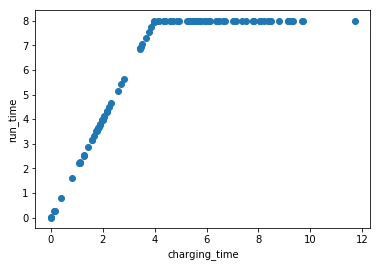

In [2]:
data_df = pd.read_csv("./trainingdata.csv", names=['charging_time', 'run_time'])
plt.scatter(data_df['charging_time'], data_df['run_time'] )
plt.xlabel('charging_time')
plt.ylabel('run_time')
plt.show()

(75,)
(75,)
(75, 1)


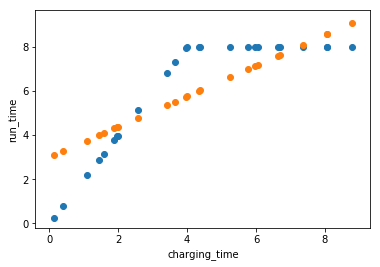

In [3]:
train_df = data_df[:75]
val_df = data_df[75:]
linModel=LinearRegression()
print(train_df['charging_time'].shape)
print(train_df['charging_time'].values.shape)
print(train_df['charging_time'].values.reshape(-1, 1).shape)
linModel.fit(train_df['charging_time'].values.reshape(-1, 1), train_df['run_time'].values.reshape(-1, 1))
prediction=linModel.predict(val_df['charging_time'].values.reshape(-1, 1))


plt.scatter(val_df['charging_time'], val_df['run_time'] )
plt.scatter(val_df['charging_time'], prediction )
plt.xlabel('charging_time')
plt.ylabel('run_time')
plt.show()

The cost for epoch no  0  is  79.36544759886002
The cost for epoch no  300  is  3.7372282218181
The cost for epoch no  600  is  3.5880423749095036
The cost for epoch no  900  is  3.4563779722642964
The cost for epoch no  1200  is  3.334702659467882
The cost for epoch no  1500  is  3.2222580762378827
The cost for epoch no  1800  is  3.1183439459784212
The cost for epoch no  2100  is  3.0223131176592504
The cost for epoch no  2400  is  2.9335675354690323
The cost for epoch no  2700  is  2.8515545142743766


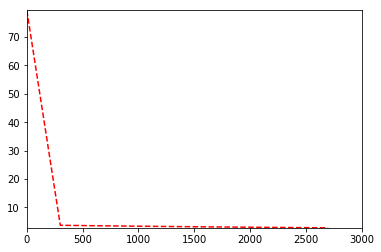

In [7]:
# to generate W between 0 and [-1,1]
w = tf.Variable(tf.truncated_normal([1,1], dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

# Define Cost/Loss
def calc(x, y):
# Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]
y, cost = calc(train_df['charging_time'].values.reshape(-1, 1), train_df['run_time'].values.reshape(-1, 1))
learning_rate = 0.00025
epochs = 3000

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



cost_points = []
epoch_points = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0,epochs):
        sess.run(optimizer)
        if epoch%300 == 0:
            epoch_points.append(epoch)
            cost_points.append(sess.run(cost))
            print("The cost for epoch no ",epoch, ' is ',sess.run(cost))

    plt.plot(epoch_points, cost_points, 'r--')
    plt.axis([0, epochs, min(cost_points), max(cost_points)])
    plt.show()

    test_cost = calc(val_df['charging_time'].values.reshape(-1, 1), val_df['run_time'].values.reshape(-1, 1))
    pred, err = sess.run(test_cost)


    

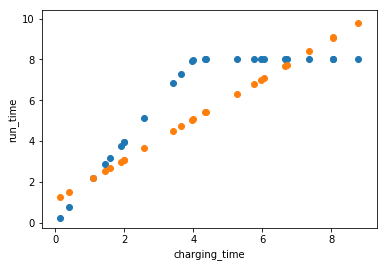

In [8]:
plt.scatter(val_df['charging_time'], val_df['run_time'] )
plt.scatter(val_df['charging_time'], pred )
plt.xlabel('charging_time')
plt.ylabel('run_time')
plt.show()
    